![NAMA Logo](NAMA-logo.jpg)

I will manipulate this data with pandas and use it to answer quesstions like:
- What department had the highest number of reported cases over the year?
- What year had the least amount of complain recorded at the helpdesk?
- The amount of issues 'REFERRED TO' each department at NAMA
- Most active Helpdesk Officer?
- Time series of each 'REFERRED TO' Category

# Brief Description of the Data
I got the data from the helpdesk where technical issues reported by staff are recorded. The data contains:

###### USER: The name of the user reporting the issue
###### DEPARTMENT: The department of the user reporting the issue
###### EXT. NO: This is recorded when the Staff call using the AYAYA IP phone
###### FAULT DESCRIPTION: Brief description of the fault reported to the helpdesk
###### STATUS: This can either be PENDING or RESOLVED, depending on the state of the issue
###### REFFERED TO: This is simply the department at ICT the issue is referred to, This can either be:
- Business Operations Support (BOS): This unit handles all ICT hardware component installation and maintenance ranging from desktop computers to laptops
- Business Intelligent System (BIS): This department deals with the different computer software used by the organisation.
- REPROGRAPHIC: This departments deals with issues related to printers.
- NETCOMMS: Issues with networking and communications services at NAMA.
###### DATE: The date the issue was reported
###### HELPDESK. OFF: The helpdesk officer that recored the fault, usually an IT Student




# Visual Description of NAMA Helpdesk Data

Importing the necessary libaries for this project

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

Using Pandas to read the CSV file, and also converting the date into pandas default datetime 

In [280]:
nama_data = pd.read_csv("nama_dataa.csv", parse_dates=['DATE'])

In [281]:
nama_data.shape

(328, 8)

In [282]:
nama_data.head(4)

,USER,DEPARTMENT,EXT NO.,FAULT DESCRIPTION,STATUS,REFERRED TO,DATE,HELPDESK OFF.
0,DOLAPO,DOMESTIC OPERATIONS BILLING SECTION,NaN,GOOGLE CHROME NOT OPENING,RESOLVED,BIS,2024-10-18,JAMILA
1,MATHIAS,DOMESTIC OPERATIONS BILLING SECTION,2265.0,NO NETWORK AND BILLING SOFTWARE NOT WORKING,RESOLVED,BIS,2023-09-29,JAMILA
2,Mr Martins,DOMESTIC OPERATIONS BILLING SECTION,NaN,Cant log into system,RESOLVED,BIS,2023-09-13,Jamila
3,Mr Bartholomew,GM WPL,NaN,MICROSOFT WORD NOT ENABLED,RESOLVED,BIS,2023-09-11,JAMILA


In [283]:
nama_data.describe()

,EXT NO.,DATE
count,138.000000,328
mean,2165.608696,2021-08-27 10:54:08.780487680
min,0.000000,2018-03-12 00:00:00
25%,2104.000000,2020-09-11 00:00:00
50%,2148.000000,2021-12-20 12:00:00
75%,2246.000000,2022-08-16 18:00:00
max,4385.000000,2024-11-28 00:00:00
std,274.818704,NaN


# DATA CLEANING

Checking for missing values

In [284]:
nama_data.isna().sum()

USER                   0
DEPARTMENT             0
EXT NO.              190
FAULT DESCRIPTION      0
STATUS                 0
REFERRED TO            0
DATE                   0
HELPDESK OFF.          0
dtype: int64

##### Getting rid of the EXT NO. with the drop() method

In [285]:
nama_data = nama_data.drop(columns=['EXT NO.'])
nama_data.head(5)

,USER,DEPARTMENT,FAULT DESCRIPTION,STATUS,REFERRED TO,DATE,HELPDESK OFF.
0,DOLAPO,DOMESTIC OPERATIONS BILLING SECTION,GOOGLE CHROME NOT OPENING,RESOLVED,BIS,2024-10-18,JAMILA
1,MATHIAS,DOMESTIC OPERATIONS BILLING SECTION,NO NETWORK AND BILLING SOFTWARE NOT WORKING,RESOLVED,BIS,2023-09-29,JAMILA
2,Mr Martins,DOMESTIC OPERATIONS BILLING SECTION,Cant log into system,RESOLVED,BIS,2023-09-13,Jamila
3,Mr Bartholomew,GM WPL,MICROSOFT WORD NOT ENABLED,RESOLVED,BIS,2023-09-11,JAMILA
4,MATTHIAS,COMMERCIAL,BILLING SOFTWARE NOT WORKNG,RESOLVED,BIS,2023-09-04,IFEOLUWA


#### Confirming the REFERRED TO column has the 4 distinct categories

In [286]:
nama_data["REFERRED TO"].unique()

array(['BIS', 'BOS', 'REPROGRAPHIC', 'NETCOMMS'], dtype=object)

Adjusting the FAULT DESCRIPTION column into sentence case

In [287]:
nama_data['FAULT DESCRIPTION'] = nama_data['FAULT DESCRIPTION'].str.capitalize()
# nama_data.head(5)

In [288]:
# The USER and the HELPDESK OFFICER should also maintain a certain sentence style
nama_data['USER'] = nama_data['USER'].str.title()
nama_data['HELPDESK OFF.'] = nama_data['HELPDESK OFF.'].str.title()
nama_data.head(3)

,USER,DEPARTMENT,FAULT DESCRIPTION,STATUS,REFERRED TO,DATE,HELPDESK OFF.
0,Dolapo,DOMESTIC OPERATIONS BILLING SECTION,Google chrome not opening,RESOLVED,BIS,2024-10-18,Jamila
1,Mathias,DOMESTIC OPERATIONS BILLING SECTION,No network and billing software not working,RESOLVED,BIS,2023-09-29,Jamila
2,Mr Martins,DOMESTIC OPERATIONS BILLING SECTION,Cant log into system,RESOLVED,BIS,2023-09-13,Jamila


### FILTERING THE NUMBER OF DEPARTMENT TO AID PROPER VISUALIZATION

In [289]:
# nama_data['DEPARTMENT'].unique()

In [290]:
nama_data['YEAR'] = nama_data['DATE'].dt.year
nama_data

,USER,DEPARTMENT,FAULT DESCRIPTION,STATUS,REFERRED TO,DATE,HELPDESK OFF.,YEAR
0,Dolapo,DOMESTIC OPERATIONS BILLING SECTION,Google chrome not opening,RESOLVED,BIS,2024-10-18,Jamila,2024
1,Mathias,DOMESTIC OPERATIONS BILLING SECTION,No network and billing software not working,RESOLVED,BIS,2023-09-29,Jamila,2023
2,Mr Martins,DOMESTIC OPERATIONS BILLING SECTION,Cant log into system,RESOLVED,BIS,2023-09-13,Jamila,2023
3,Mr Bartholomew,GM WPL,Microsoft word not enabled,RESOLVED,BIS,2023-09-11,Jamila,2023
4,Matthias,COMMERCIAL,Billing software not workng,RESOLVED,BIS,2023-09-04,Ifeoluwa,2023
...,...,...,...,...,...,...,...,...
323,Mrs Esther,HR INDUSTRIAL RELATIONS AND DISCIPLINE UNIT,Problem logging into wifi on her pc,RESOLVED,NETCOMMS,2022-08-01,Chioma,2022
324,Mrs Adegoke,COMMERCIAL,Internet connection problem,RESOLVED,NETCOMMS,2024-04-25,Chioma,2024
325,Odukunle,SERVICOM,No internet connection,RESOLVED,NETCOMMS,2022-07-13,Tamara,2022
326,Rhoda,GM ATC OPERATION,Network cable,RESOLVED,NETCOMMS,2022-05-27,Tamara,2022


In [291]:
nama_data['DEPARTMENT'].value_counts().head(20).sum()

147

In [292]:
top_department = nama_data['DEPARTMENT'].value_counts().head(20).index
top_department

Index(['COMMERCIAL', 'AUDIT', 'CLIENT SERVICE', 'FINANCE',
       'DOMESTIC OPERATIONS BILLING SECTION', 'PROCUREMENT', 'GENERAL STORES',
       'SERVICOM', 'GM COMMERCIAL', 'INTERNATIONAL BILLING SECTION',
       'DHR DIRECTORATE OF HUMAN RESOURCES AND ADMINISTRATION ',
       'HR TRAINING AND MANPOWER DEVELOPMENT UNIT ', 'PRS',
       'BUSINESS DEVELOPMENT', 'HR WELFARE', 'ACCOUNTS', 'GM STORES',
       'CNS/ICT STORE', 'HR PENSION UNIT', 'ACCOUNT REVENUE '],
      dtype='object', name='DEPARTMENT')

In [293]:
filtered_data = nama_data[nama_data['DEPARTMENT'].isin(top_department)]
# Reset the index of the filtered DataFrame
filtered_data.reset_index(drop=True, inplace=True)
filtered_data

,USER,DEPARTMENT,FAULT DESCRIPTION,STATUS,REFERRED TO,DATE,HELPDESK OFF.,YEAR
0,Dolapo,DOMESTIC OPERATIONS BILLING SECTION,Google chrome not opening,RESOLVED,BIS,2024-10-18,Jamila,2024
1,Mathias,DOMESTIC OPERATIONS BILLING SECTION,No network and billing software not working,RESOLVED,BIS,2023-09-29,Jamila,2023
2,Mr Martins,DOMESTIC OPERATIONS BILLING SECTION,Cant log into system,RESOLVED,BIS,2023-09-13,Jamila,2023
3,Matthias,COMMERCIAL,Billing software not workng,RESOLVED,BIS,2023-09-04,Ifeoluwa,2023
4,Mr Alfred,PROCUREMENT,System not booting,RESOLVED,BIS,2023-06-05,John,2023
...,...,...,...,...,...,...,...,...
142,Mrs Patricia,GM STORES,Internet connection,RESOLVED,NETCOMMS,2024-10-05,Yerima,2024
143,Patience,SERVICOM,No internet connection,RESOLVED,NETCOMMS,2023-06-13,Ifeoluwa,2023
144,Nathaniel,COMMERCIAL,Brower on the systwem isnt working,RESOLVED,NETCOMMS,2022-08-04,Tamara,2022
145,Mrs Adegoke,COMMERCIAL,Internet connection problem,RESOLVED,NETCOMMS,2024-04-25,Chioma,2024


## Data Visualization

##### Plotting to show the Number of issues reported by each Department

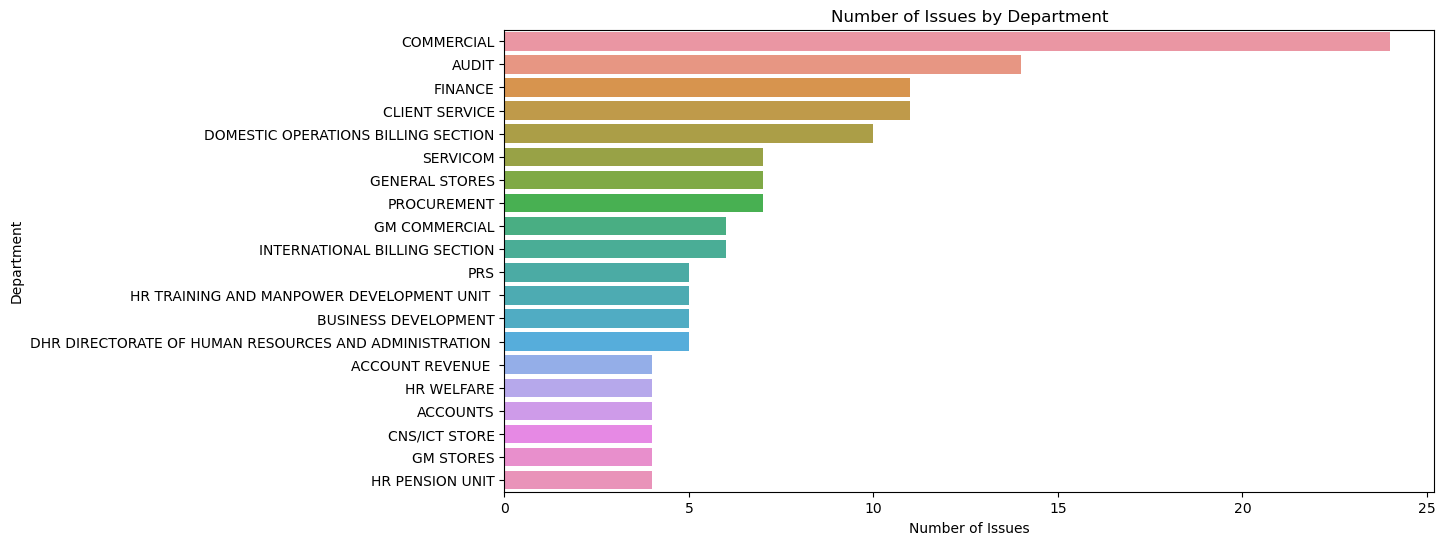

In [298]:
plt.figure(figsize=(12, 6))
sns.countplot(y='DEPARTMENT', data=filtered_data, order=filtered_data['DEPARTMENT'].value_counts().index)
plt.title('Number of Issues by Department')
plt.xlabel('Number of Issues')
plt.ylabel('Department')
plt.show()


From the plot above, you can tell the Commercial department reported more isssues 

#####  Time Series that show the number of issues reported Yearly

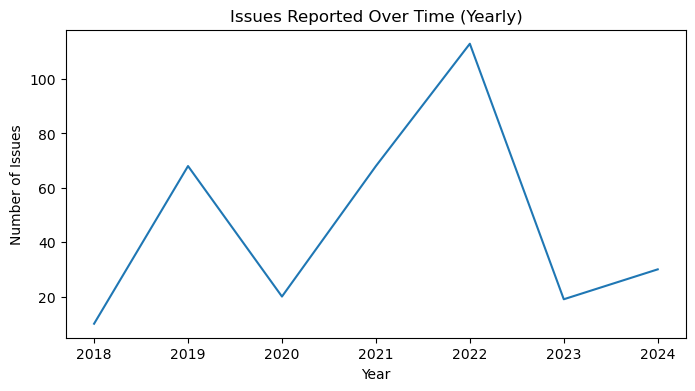

In [296]:
issues_yearly = nama_data.groupby(nama_data['YEAR'])['DATE'].count()

# Plotting the issues over time
plt.figure(figsize=(8, 4))
plt.plot(issues_yearly.index, issues_yearly.values)

# properties
plt.title('Issues Reported Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Issues')
plt.xticks(issues_yearly.index) 
# plt.grid()

# Displaying the plot
plt.show()


2022 recorded the most number of issues with over 100 faults

##### Bar plot showing the number of issues REFERRED TO the each ICT department

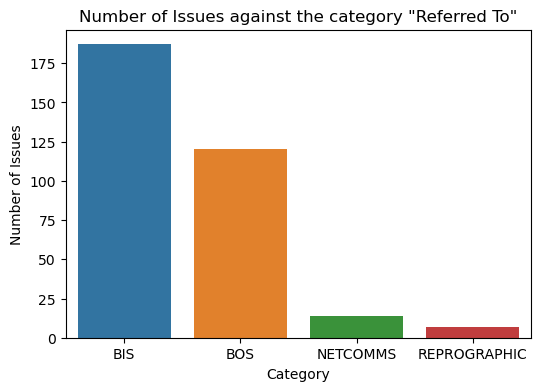

In [299]:
plt.figure(figsize=(6,4))
sns.countplot(x='REFERRED TO', data=nama_data, order=nama_data['REFERRED TO'].value_counts().index)
plt.title('Number of Issues against the category "Referred To"')
plt.xlabel('Category')
plt.ylabel('Number of Issues')
plt.show()


###### The least "referred to" department at the ICT is the reprographic with less than 10 issues recorded so far.
###### The most "referred to" department at the ICT is the Business Intelligent System with over 175 issues recorder

### This plot shows the number of issues resolved by the most active Helpdesk Officers 

In [238]:
nama_data['HELPDESK OFF.'].unique()

array(['Jamila', 'Ifeoluwa', 'Hogan-Bassey John', 'Leo', 'Tamara',
       'Samuel', 'Jeffery', 'Shehu', 'Tunji', 'Goodness', 'Somtochukwu',
       'Michael', 'Mojameel', 'Mojameel;', 'Roselyn', 'Francisca', 'Dami',
       'Kachi', 'Oyinkansola', 'Etim', 'Etimfon', 'Emeka',
       'Chucks And Mabel', 'Mabel', 'Emeka ', 'Chioke', 'Mr. Toby',
       'Mrs. Foluke', 'Mr Leo', 'Olamide', 'Ayomide', 'Aishat', 'Zuliat',
       'Lawal Habeeb', 'Uche', 'Habeeb', 'Favour', 'Heekmat', 'Fav Our',
       'Stephanie', 'Asunmoh', 'Chidindu', 'Wisdom', 'Juliet', 'Chidinma',
       'Esther', 'Abisolami', 'Muhammad', 'Hajara', 'Yerima', 'Chioma',
       'George', 'Peter', 'Evangel', 'Evans', 'Mayowa', 'Christian',
       'John Hogan-Bassey'], dtype=object)

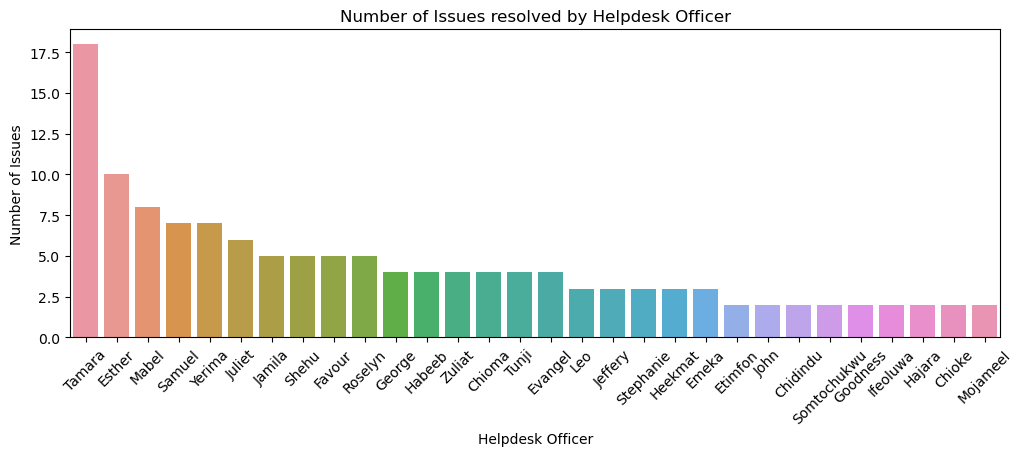

In [301]:
#  plotting
plt.figure(figsize=(12, 4))
sns.countplot(x='HELPDESK OFF.', data=filtered_data, order=filtered_data['HELPDESK OFF.'].value_counts().head(30).index)
# props
plt.title('Number of Issues resolved by Helpdesk Officer')
plt.xlabel('Helpdesk Officer')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45)
plt.show()


#### Time Series of Issues "Reffered to"

<Figure size 1000x400 with 0 Axes>

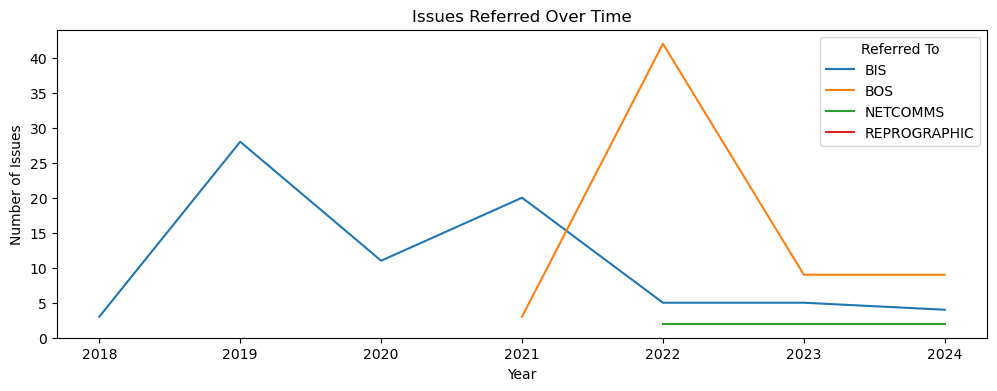

In [303]:
# Plotting
plt.figure(figsize=(10, 4))
issues_referred = filtered_data.groupby(['YEAR', 'REFERRED TO']).size().unstack()
issues_referred.plot(figsize=(12, 4))

# Properties
plt.title('Issues Referred Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Issues')
plt.legend(title='Referred To')

# Display
plt.show()


The plot above basically state that time series of each "REFERRED TO" Category 